In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dataset=pd.read_csv('./diabetes.csv')
print(dataset.columns)    

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [2]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print("Dimension of diabetes data : {}".format(dataset.shape))

Dimension of diabetes data : (768, 9)


In [4]:
print(dataset.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

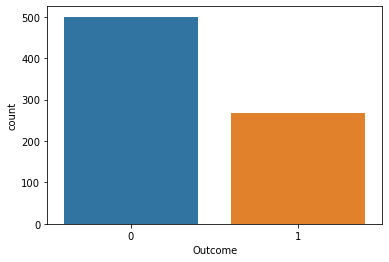

In [2]:
import seaborn as sns
sns.countplot(dataset['Outcome'],label="count")

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
#mutual association of independent variables with dependent variable Outcome
from sklearn.feature_selection import mutual_info_regression
X=dataset.drop("Outcome",axis=1)
y=dataset['Outcome']
#discrete_features=X.dtypes == int
def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y)
mi_scores

Glucose                     0.107171
Age                         0.094925
BMI                         0.082757
Insulin                     0.062655
Pregnancies                 0.046839
SkinThickness               0.020940
DiabetesPedigreeFunction    0.009636
BloodPressure               0.000000
Name: MI Scores, dtype: float64

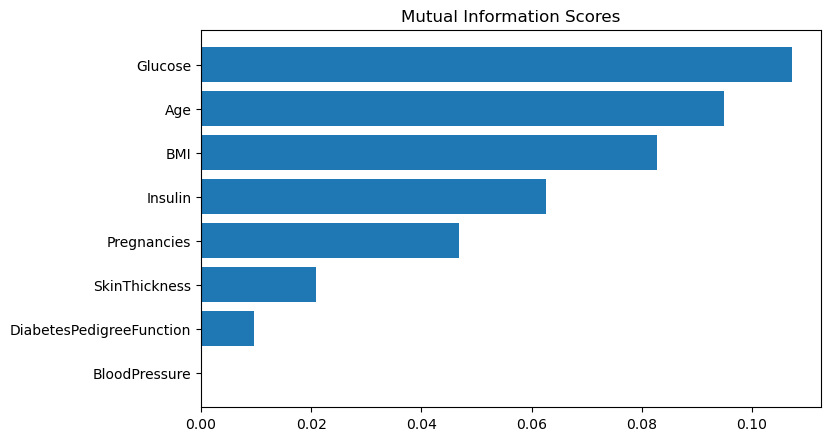

In [8]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [ ]:
import seaborn as sns
sns.pairplot(dataset,hue='Outcome')

In [9]:
corr = dataset.corr()
corr.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
fig = plt.figure(figsize = (15,20)) #figsize is the width and height in inches
ax = fig.gca()#gca is used to get current axes instance on the current figure
dataset.hist(ax=ax)

In [10]:
x_set1=np.concatenate((dataset['Glucose'].to_numpy().reshape(len(dataset['Glucose']),1),
                             dataset['Insulin'].to_numpy().reshape(len(dataset['Insulin']),1)),axis=1)

x_set2=np.concatenate((dataset['Pregnancies'].to_numpy().reshape(len(dataset['Pregnancies']),1),
                              dataset['Age'].to_numpy().reshape(len(dataset['Age']),1)),axis=1)

x_set3=np.concatenate((dataset['BMI'].to_numpy().reshape(len(dataset['BMI']),1),
                              dataset['SkinThickness'].to_numpy().reshape(len(dataset['SkinThickness']),1)),axis=1)


y_set=dataset['Outcome']

from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1=train_test_split(x_set1,y_set
                                               ,random_state=66,stratify=dataset['Outcome'])
X_train2,X_test2,y_train2,y_test2=train_test_split(x_set2,y_set
                                               ,random_state=66,stratify=dataset['Outcome'])
X_train3,X_test3,y_train3,y_test3=train_test_split(x_set3,y_set
                                               ,random_state=66,stratify=dataset['Outcome'])

In [11]:
#training on Glucose and Insulin feature
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score
sc1=StandardScaler()
X_train1=sc1.fit_transform(X_train1)
X_test1=sc1.fit_transform(X_test1)
from sklearn.linear_model import LogisticRegression
lr1=LogisticRegression()
lr1.fit(X_train1,y_train1)
y_pred=lr1.predict(X_test1)
cm=confusion_matrix(y_pred,y_test1)
print(cm)
print(accuracy_score(y_pred,y_test1))


[[110  33]
 [ 15  34]]
0.75


-2.701320690853123 206.87546255326964


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


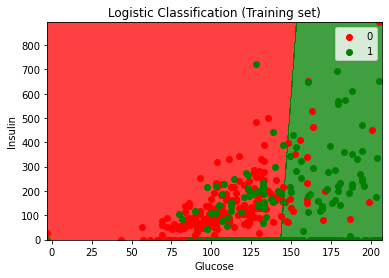

In [12]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc1.inverse_transform(X_train1), y_train1
print(X_set[:,0].min(),X_set[:,0].max())
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = 0.25),
                     np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 0.25))
plt.contourf(X1, X2, lr1.predict(sc1.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Classification (Training set)')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.legend()
plt.show()

0.0 198.0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


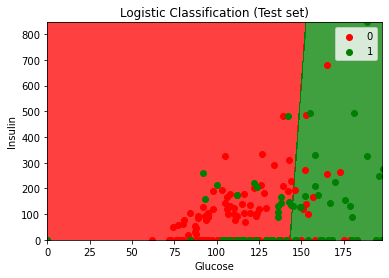

In [13]:

from matplotlib.colors import ListedColormap
X_set, y_set = sc1.inverse_transform(X_test1), y_test1
print(X_set[:,0].min(),X_set[:,0].max())
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = 0.25),
                     np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 0.25))
plt.contourf(X1, X2, lr1.predict(sc1.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Classification (Test set)')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.legend()
plt.show()

In [14]:
#training on No of pregnancies and Age feature
X_train2=sc1.fit_transform(X_train2)
X_test2=sc1.fit_transform(X_test2)

lr2=LogisticRegression()
lr2.fit(X_train2,y_train2)
y_pred=lr2.predict(X_test2)
cm=confusion_matrix(y_pred,y_test2)
print(cm)
print(accuracy_score(y_pred,y_test2))


[[114  55]
 [ 11  12]]
0.65625


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


0.17579226322996577 17.94329441493998


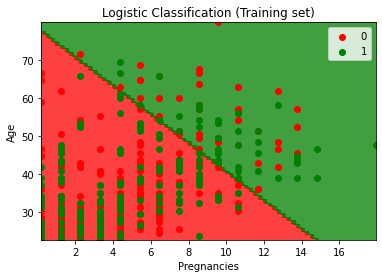

In [15]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc1.inverse_transform(X_train2), y_train2
print(X_set[:,0].min(),X_set[:,0].max())
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = 0.25),
                     np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 0.25))
plt.contourf(X1, X2, lr2.predict(sc1.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Classification (Training set)')
plt.xlabel('Pregnancies')
plt.ylabel('Age')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


0.0 15.0


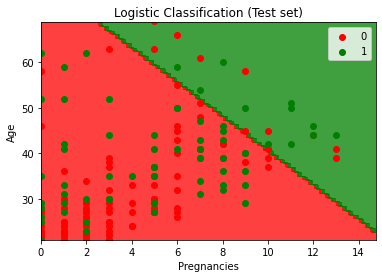

In [16]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc1.inverse_transform(X_test2), y_test2
print(X_set[:,0].min(),X_set[:,0].max())
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = 0.25),
                     np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 0.25))
plt.contourf(X1, X2, lr2.predict(sc1.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Classification (Test set)')
plt.xlabel('Pregnancies')
plt.ylabel('Age')
plt.legend()
plt.show()

In [17]:
#training on BMI and SkinThickness feature

X_train3=sc1.fit_transform(X_train3)
X_test3=sc1.fit_transform(X_test3)

lr3=LogisticRegression()
lr3.fit(X_train3,y_train3)
y_pred=lr3.predict(X_test3)
cm=confusion_matrix(y_pred,y_test3)
print(cm)
print(accuracy_score(y_pred,y_test3))


[[106  54]
 [ 19  13]]
0.6197916666666666


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


4.7081792965615925 63.03128927376089


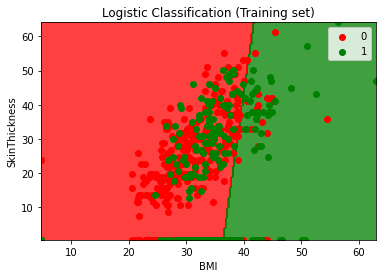

In [18]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc1.inverse_transform(X_train3), y_train3
print(X_set[:,0].min(),X_set[:,0].max())
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = 0.25),
                     np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 0.25))
plt.contourf(X1, X2, lr3.predict(sc1.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Classification (Training set)')
plt.xlabel('BMI')
plt.ylabel('SkinThickness')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


0.0 52.3


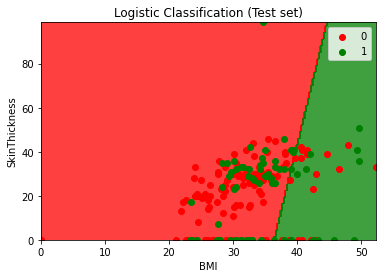

In [19]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc1.inverse_transform(X_test3), y_test3
print(X_set[:,0].min(),X_set[:,0].max())
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = 0.25),
                     np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 0.25))
plt.contourf(X1, X2, lr3.predict(sc1.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Classification (Test set)')
plt.xlabel('BMI')
plt.ylabel('SkinThickness')
plt.legend()
plt.show()

In [20]:
#Logistic Regression on all features
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.loc[:, dataset.columns != 'Outcome'], 
                                                     dataset['Outcome'], stratify=dataset['Outcome'], random_state=66)
print(X_train.shape)
print(X_train)
print(X_test.shape)
print(X_test)
print(y_train.shape)
print(y_train)
print(y_test.shape)
print(y_test)

(576, 8)
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
612            7      168             88             42      321  38.2   
557            8      110             76              0        0  27.8   
26             7      147             76              0        0  39.4   
70             2      100             66             20       90  32.9   
73             4      129             86             20      270  35.1   
..           ...      ...            ...            ...      ...   ...   
632            2      111             60              0        0  26.2   
56             7      187             68             39      304  37.7   
530            2      122             60             18      106  29.8   
568            4      154             72             29      126  31.3   
544            1       88             78             29       76  32.0   

     DiabetesPedigreeFunction  Age  
612                     0.787   40  
557                     0.23

In [21]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
print(X_train.shape)
print(X_train)
print(X_test.shape)
print(X_test)

(576, 8)
[[ 0.97457151  1.52528095  0.94599501 ...  0.78036618  0.907501
   0.59363371]
 [ 1.27524274 -0.31683408  0.35393439 ... -0.49918316 -0.72639999
   2.11034006]
 [ 0.97457151  0.85830827  0.35393439 ...  0.92800649 -0.66698541
   0.8464181 ]
 ...
 [-0.52878465  0.06429317 -0.43547977 ... -0.25311598  0.69954996
  -0.92307263]
 [ 0.07255781  1.0806325   0.15658085 ... -0.06856559 -0.42635635
   0.34084932]
 [-0.82945588 -1.01556737  0.45261116 ...  0.01755792 -0.34614667
  -0.33324239]]
(192, 8)
[[-1.13012711  1.9064082   1.04467178 ...  0.57120908 -0.49765385
   0.1723264 ]
 [-0.52878465 -0.85676435 -0.23812623 ...  0.75575946  0.57180861
  -0.83881117]
 [-0.52878465 -0.18979167 -0.04077269 ... -0.38845293 -1.15715571
  -0.67028824]
 ...
 [-1.13012711  1.33471733  0.35393439 ...  2.18294912 -0.3491174
  -0.58602678]
 [ 2.47792767 -1.14260979  0.15658085 ... -0.26541934 -0.54815625
   1.09920249]
 [-1.13012711 -0.82500375 -3.39578288 ... -3.91951699 -0.66995614
  -0.67028824]]


In [55]:
#Logistic Regression on all features
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
classifier100=LogisticRegression(C=100).fit(X_train,y_train)
classifier001=LogisticRegression(C=0.001).fit(X_train,y_train)

In [56]:
y_pred=classifier.predict(X_test)
y_pred1=classifier100.predict(X_test)
y_pred2=classifier001.predict(X_test)

print(type(y_pred),type(y_test))
print(np.concatenate(( y_pred.reshape(len(y_pred),1),y_test.to_numpy().reshape(len(y_test),1) ),axis=1))


<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>
[[1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [

In [59]:
    from sklearn.metrics import confusion_matrix,accuracy_score
    
    print("Metrics of ",classifier,"\n")

    cm=confusion_matrix(y_test,y_pred)
    print(cm)
    print(accuracy_score(y_test,y_pred))
    print("OUTCOME DIABETIC\n")
    print("Mis-classification(1-accuracy)",(cm[0][1]+cm[1][0])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]))
    Sensitivity=cm[1][1]/(cm[1][1]+cm[1][0])
    print("sensitivity",Sensitivity)
    print("Specificity(TNR):",cm[0][0]/(cm[0][0]+cm[0][1]))
    Precision=cm[1][1]/(cm[1][1]+cm[0][1])
    print("precision",Precision)
    print("f1 score",2*Precision*Sensitivity/(Precision+Sensitivity))

    print("OUTCOME NON DIABETIC")
    print("Mis-classification(1-accuracy)",(cm[0][1]+cm[1][0])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]))
    Sensitivity=cm[0][0]/(cm[0][0]+cm[0][1])
    print("sensitivity",Sensitivity)
    print("Specificity(TNR):",cm[1][1]/(cm[1][1]+cm[1][0]))
    Precision=cm[0][0]/(cm[0][0]+cm[1][0])
    print("precision",Precision)
    print("f1 score",2*Precision*Sensitivity/(Precision+Sensitivity))
    
    
    print("Metrics of classifier with C=100","\n")

    cm=confusion_matrix(y_test,y_pred1)
    print(cm)
    print(accuracy_score(y_test,y_pred1))
    print("OUTCOME DIABETIC\n")
    print("Mis-classification(1-accuracy)",(cm[0][1]+cm[1][0])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]))
    Sensitivity=cm[1][1]/(cm[1][1]+cm[1][0])
    print("sensitivity",Sensitivity)
    print("Specificity(TNR):",cm[0][0]/(cm[0][0]+cm[0][1]))
    Precision=cm[1][1]/(cm[1][1]+cm[0][1])
    print("precision",Precision)
    print("f1 score",2*Precision*Sensitivity/(Precision+Sensitivity))

    print("OUTCOME NON DIABETIC")
    print("Mis-classification(1-accuracy)",(cm[0][1]+cm[1][0])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]))
    Sensitivity=cm[0][0]/(cm[0][0]+cm[0][1])
    print("sensitivity",Sensitivity)
    print("Specificity(TNR):",cm[1][1]/(cm[1][1]+cm[1][0]))
    Precision=cm[0][0]/(cm[0][0]+cm[1][0])
    print("precision",Precision)
    print("f1 score",2*Precision*Sensitivity/(Precision+Sensitivity))
    
    print("Metrics of classifier with C=0.001","\n")

    cm=confusion_matrix(y_test,y_pred2)
    print(cm)
    print(accuracy_score(y_test,y_pred2))
    print("OUTCOME DIABETIC\n")
    print("Mis-classification(1-accuracy)",(cm[0][1]+cm[1][0])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]))
    Sensitivity=cm[1][1]/(cm[1][1]+cm[1][0])
    print("sensitivity",Sensitivity)
    print("Specificity(TNR):",cm[0][0]/(cm[0][0]+cm[0][1]))
    Precision=cm[1][1]/(cm[1][1]+cm[0][1])
    print("precision",Precision)
    print("f1 score",2*Precision*Sensitivity/(Precision+Sensitivity))

    print("OUTCOME NON DIABETIC")
    print("Mis-classification(1-accuracy)",(cm[0][1]+cm[1][0])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]))
    Sensitivity=cm[0][0]/(cm[0][0]+cm[0][1])
    print("sensitivity",Sensitivity)
    print("Specificity(TNR):",cm[1][1]/(cm[1][1]+cm[1][0]))
    Precision=cm[0][0]/(cm[0][0]+cm[1][0])
    print("precision",Precision)
    print("f1 score",2*Precision*Sensitivity/(Precision+Sensitivity))


Metrics of  LogisticRegression() 

[[108  17]
 [ 28  39]]
0.765625
OUTCOME DIABETIC

Mis-classification(1-accuracy) 0.234375
sensitivity 0.582089552238806
Specificity(TNR): 0.864
precision 0.6964285714285714
f1 score 0.6341463414634148
OUTCOME NON DIABETIC
Mis-classification(1-accuracy) 0.234375
sensitivity 0.864
Specificity(TNR): 0.582089552238806
precision 0.7941176470588235
f1 score 0.8275862068965517
Metrics of classifier with C=100 

[[108  17]
 [ 28  39]]
0.765625
OUTCOME DIABETIC

Mis-classification(1-accuracy) 0.234375
sensitivity 0.582089552238806
Specificity(TNR): 0.864
precision 0.6964285714285714
f1 score 0.6341463414634148
OUTCOME NON DIABETIC
Mis-classification(1-accuracy) 0.234375
sensitivity 0.864
Specificity(TNR): 0.582089552238806
precision 0.7941176470588235
f1 score 0.8275862068965517
Metrics of classifier with C=0.001 

[[125   0]
 [ 67   0]]
0.6510416666666666
OUTCOME DIABETIC

Mis-classification(1-accuracy) 0.3489583333333333
sensitivity 0.0
Specificity(TNR): 1.0

C:\Users\Hp\AppData\Local\Temp/ipykernel_10776/886398373.py:60: RuntimeWarning: invalid value encountered in longlong_scalars
  Precision=cm[1][1]/(cm[1][1]+cm[0][1])


In [60]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifier100,X=X_train,y=y_train,cv=10)
print("Accuracy in K-fold Cross Validation(K=10) of Logistic classifier: {:.2f} %".format(accuracies.mean()*100),
                         "standard deviation :{:.2f}%".format(accuracies.std()*100))


Accuracy in K-fold Cross Validation(K=10) of Logistic classifier: 77.59 % standard deviation :4.36%


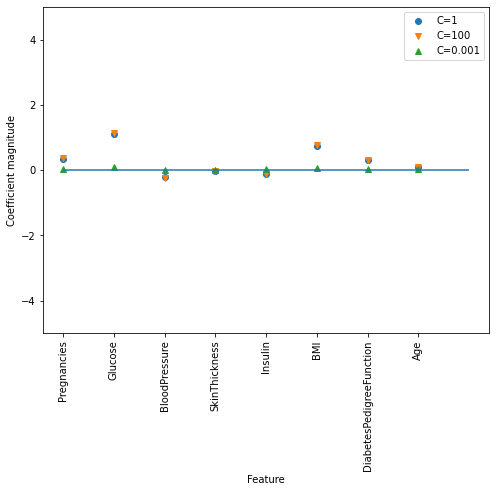

In [26]:
diabetes_features = [x for i,x in enumerate(dataset.columns) if i!=8]
plt.figure(figsize=(8,6))
plt.plot(classifier.coef_.T, 'o', label="C=1")
plt.plot(classifier100.coef_.T,'v',label="C=100")
plt.plot(classifier001.coef_.T,'^',label="C=0.001")
plt.xticks(range(dataset.shape[1]-1), diabetes_features, rotation=90)
plt.hlines(0, 0, dataset.shape[1]-1)
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

In [27]:
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
plt.show()

NameError: name 'sns' is not defined

In [61]:
#Training SVM model on glucose and insulin feature
from sklearn.svm import SVC
classifier=SVC(kernel="linear",C=13)
classifier.fit(X_train1,y_train1)
print("Score of SVM with linear kernel")
print("Training set score",classifier.score(X_train1,y_train1))
print("Test set score",classifier.score(X_test1,y_test1))
classifierrbf=SVC(kernel="rbf",C=13).fit(X_train1,y_train1)
print("Score of SVM with rbf kernel")
print("Training set score",classifierrbf.score(X_train1,y_train1))
print("Test set score",classifierrbf.score(X_test1,y_test1))

Score of SVM with linear kernel
Training set score 0.7482638888888888
Test set score 0.75
Score of SVM with rbf kernel
Training set score 0.7569444444444444
Test set score 0.7395833333333334


6.05388091473235 48.238905266930416


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


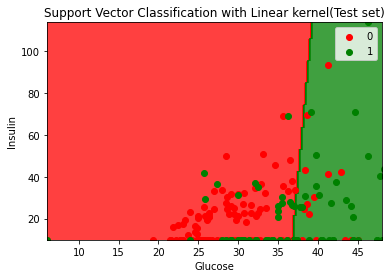

In [30]:

from matplotlib.colors import ListedColormap
X_set, y_set = sc1.inverse_transform(X_test1), y_test1
print(X_set[:,0].min(),X_set[:,0].max())
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = 0.25),
                     np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc1.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Support Vector Classification with Linear kernel(Test set)')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.legend()
plt.show()

6.05388091473235 48.238905266930416


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


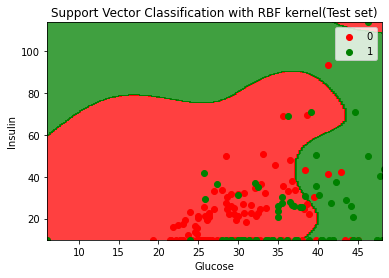

In [31]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc1.inverse_transform(X_test1), y_test1
print(X_set[:,0].min(),X_set[:,0].max())
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = 0.25),
                     np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 0.25))
plt.contourf(X1, X2, classifierrbf.predict(sc1.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Support Vector Classification with RBF kernel(Test set)')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.legend()
plt.show()

In [33]:
#SVM with linear kernel
y_pred=classifier.predict(X_test1)
cm=confusion_matrix(y_test1,y_pred)
print(cm)
print(accuracy_score(y_test1,y_pred))
print("OUTCOME DIABETIC\n")
print("Mis-classification(1-accuracy)",(cm[0][1]+cm[1][0])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]))
Sensitivity=cm[1][1]/(cm[1][1]+cm[1][0])
print("sensitivity",Sensitivity)
print("Specificity(TNR):",cm[0][0]/(cm[0][0]+cm[0][1]))
Precision=cm[1][1]/(cm[1][1]+cm[0][1])
print("precision",Precision)
print("f1 score",2*Precision*Sensitivity/(Precision+Sensitivity))

print("OUTCOME NON DIABETIC")
print("Mis-classification(1-accuracy)",(cm[0][1]+cm[1][0])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]))
Sensitivity=cm[0][0]/(cm[0][0]+cm[0][1])
print("sensitivity",Sensitivity)
print("Specificity(TNR):",cm[1][1]/(cm[1][1]+cm[1][0]))
Precision=cm[0][0]/(cm[0][0]+cm[1][0])
print("precision",Precision)
print("f1 score",2*Precision*Sensitivity/(Precision+Sensitivity))


[[111  14]
 [ 34  33]]
0.75
OUTCOME DIABETIC

Mis-classification(1-accuracy) 0.25
sensitivity 0.4925373134328358
Specificity(TNR): 0.888
precision 0.7021276595744681
f1 score 0.5789473684210525
OUTCOME NON DIABETIC
Mis-classification(1-accuracy) 0.25
sensitivity 0.888
Specificity(TNR): 0.4925373134328358
precision 0.7655172413793103
f1 score 0.8222222222222222


In [34]:
#SVM with radial basis function
y_pred=classifierrbf.predict(X_test1)
cm=confusion_matrix(y_test1,y_pred)
print(cm)
print(accuracy_score(y_test1,y_pred))
print("OUTCOME DIABETIC\n")
print("Mis-classification(1-accuracy)",(cm[0][1]+cm[1][0])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]))
Sensitivity=cm[1][1]/(cm[1][1]+cm[1][0])
print("sensitivity",Sensitivity)
print("Specificity(TNR):",cm[0][0]/(cm[0][0]+cm[0][1]))
Precision=cm[1][1]/(cm[1][1]+cm[0][1])
print("precision",Precision)
print("f1 score",2*Precision*Sensitivity/(Precision+Sensitivity))

print("OUTCOME NON DIABETIC")
print("Mis-classification(1-accuracy)",(cm[0][1]+cm[1][0])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]))
Sensitivity=cm[0][0]/(cm[0][0]+cm[0][1])
print("sensitivity",Sensitivity)
print("Specificity(TNR):",cm[1][1]/(cm[1][1]+cm[1][0]))
Precision=cm[0][0]/(cm[0][0]+cm[1][0])
print("precision",Precision)
print("f1 score",2*Precision*Sensitivity/(Precision+Sensitivity))


[[116   9]
 [ 41  26]]
0.7395833333333334
OUTCOME DIABETIC

Mis-classification(1-accuracy) 0.2604166666666667
sensitivity 0.3880597014925373
Specificity(TNR): 0.928
precision 0.7428571428571429
f1 score 0.5098039215686275
OUTCOME NON DIABETIC
Mis-classification(1-accuracy) 0.2604166666666667
sensitivity 0.928
Specificity(TNR): 0.3880597014925373
precision 0.7388535031847133
f1 score 0.822695035460993


In [35]:
#SVM with linear kernel on all features
classifier=SVC(kernel="linear",C=10)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))
print("OUTCOME DIABETIC\n")
print("Mis-classification(1-accuracy)",(cm[0][1]+cm[1][0])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]))
Sensitivity=cm[1][1]/(cm[1][1]+cm[1][0])
print("sensitivity",Sensitivity)
print("Specificity(TNR):",cm[0][0]/(cm[0][0]+cm[0][1]))
Precision=cm[1][1]/(cm[1][1]+cm[0][1])
print("precision",Precision)
print("f1 score",2*Precision*Sensitivity/(Precision+Sensitivity))

print("OUTCOME NON DIABETIC")
print("Mis-classification(1-accuracy)",(cm[0][1]+cm[1][0])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]))
Sensitivity=cm[0][0]/(cm[0][0]+cm[0][1])
print("sensitivity",Sensitivity)
print("Specificity(TNR):",cm[1][1]/(cm[1][1]+cm[1][0]))
Precision=cm[0][0]/(cm[0][0]+cm[1][0])
print("precision",Precision)
print("f1 score",2*Precision*Sensitivity/(Precision+Sensitivity))



[[109  16]
 [ 28  39]]
0.7708333333333334
OUTCOME DIABETIC

Mis-classification(1-accuracy) 0.22916666666666666
sensitivity 0.582089552238806
Specificity(TNR): 0.872
precision 0.7090909090909091
f1 score 0.6393442622950819
OUTCOME NON DIABETIC
Mis-classification(1-accuracy) 0.22916666666666666
sensitivity 0.872
Specificity(TNR): 0.582089552238806
precision 0.7956204379562044
f1 score 0.83206106870229


In [36]:
#SVM with radial basis function on all features
classifierrbf=SVC(kernel="rbf",C=13).fit(X_train,y_train)

y_pred=classifierrbf.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))
print("OUTCOME DIABETIC\n")
print("Mis-classification(1-accuracy)",(cm[0][1]+cm[1][0])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]))
Sensitivity=cm[1][1]/(cm[1][1]+cm[1][0])
print("sensitivity",Sensitivity)
print("Specificity(TNR):",cm[0][0]/(cm[0][0]+cm[0][1]))
Precision=cm[1][1]/(cm[1][1]+cm[0][1])
print("precision",Precision)
print("f1 score",2*Precision*Sensitivity/(Precision+Sensitivity))

print("OUTCOME NON DIABETIC")
print("Mis-classification(1-accuracy)",(cm[0][1]+cm[1][0])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]))
Sensitivity=cm[0][0]/(cm[0][0]+cm[0][1])
print("sensitivity",Sensitivity)
print("Specificity(TNR):",cm[1][1]/(cm[1][1]+cm[1][0]))
Precision=cm[0][0]/(cm[0][0]+cm[1][0])
print("precision",Precision)
print("f1 score",2*Precision*Sensitivity/(Precision+Sensitivity))


[[103  22]
 [ 18  49]]
0.7916666666666666
OUTCOME DIABETIC

Mis-classification(1-accuracy) 0.20833333333333334
sensitivity 0.7313432835820896
Specificity(TNR): 0.824
precision 0.6901408450704225
f1 score 0.7101449275362318
OUTCOME NON DIABETIC
Mis-classification(1-accuracy) 0.20833333333333334
sensitivity 0.824
Specificity(TNR): 0.7313432835820896
precision 0.8512396694214877
f1 score 0.83739837398374


In [37]:
accuracies=cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10)
print("Accuracy of SVM classifier with linear kernel in K fold Cross Validation: {:.2f} %".format(accuracies.mean()*100),
                         "standard deviation :{:.2f}%".format(accuracies.std()*100))

accuracies=cross_val_score(estimator=classifierrbf,X=X_train,y=y_train,cv=10)
print("Accuracy of SVM classifier with rbf kernel in K fold Cross Validation: {:.2f} %".format(accuracies.mean()*100),
                         "standard deviation :{:.2f}%".format(accuracies.std()*100))

Accuracy of SVM classifier with linear kernel in K fold Cross Validation: 77.25 % standard deviation :4.31%
Accuracy of SVM classifier with rbf kernel in K fold Cross Validation: 71.50 % standard deviation :5.93%


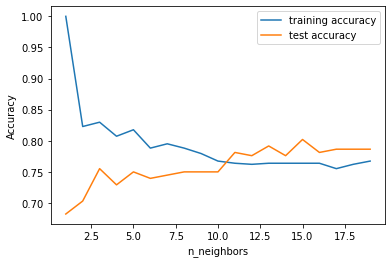

In [64]:
from sklearn.neighbors import KNeighborsClassifier
training_accuracy=[]
test_accuracy=[]
neighbors_settings=range(1,20)

for n_neighbors in neighbors_settings:
           classifier=KNeighborsClassifier(n_neighbors=n_neighbors)
           classifier.fit(X_train,y_train)
           training_accuracy.append(classifier.score(X_train,y_train))
           test_accuracy.append(classifier.score(X_test,y_test))
            
plt.plot(neighbors_settings,training_accuracy,label="training accuracy")
plt.plot(neighbors_settings,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [65]:
# for n_neighbors=13 training and test set show better accuracy
knnclassifier=KNeighborsClassifier(n_neighbors=13)

In [66]:
#training KNN model on glucose and insulin feature
knnclassifier.fit(X_train1,y_train1)
print("Training set score",knnclassifier.score(X_train1,y_train1))
print("Test set score",knnclassifier.score(X_test1,y_test1))

Training set score 0.7465277777777778
Test set score 0.7395833333333334


6.05388091473235 48.238905266930416


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


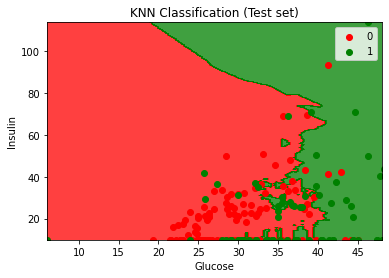

In [67]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc1.inverse_transform(X_test1), y_test1
print(X_set[:,0].min(),X_set[:,0].max())
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = 0.25),
                     np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 0.25))
plt.contourf(X1, X2, knnclassifier.predict(sc1.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN Classification (Test set)')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.legend()
plt.show()

In [68]:
#training KNN model on all features
knnclassifier.fit(X_train,y_train)

Training set score 0.7638888888888888
Test set score 0.7916666666666666


In [69]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=knnclassifier,X=X_train,y=y_train,cv=10)
print("Accuracy of KNN classifier in K fold cross validation: {:.2f} %".format(accuracies.mean()*100),
                         "standard deviation :{:.2f}%".format(accuracies.std()*100))


Accuracy of KNN classifier in K fold cross validation: 72.91 % standard deviation :5.67%


In [70]:
y_pred=knnclassifier.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

print("OUTCOME DIABETIC\n")
print("Mis-classification(1-accuracy)",(cm[0][1]+cm[1][0])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]))
Sensitivity=cm[1][1]/(cm[1][1]+cm[1][0])
print("sensitivity",Sensitivity)
print("Specificity(TNR):",cm[0][0]/(cm[0][0]+cm[0][1]))
Precision=cm[1][1]/(cm[1][1]+cm[0][1])
print("precision",Precision)
print("f1 score",2*Precision*Sensitivity/(Precision+Sensitivity))

print("OUTCOME NON DIABETIC")
print("Mis-classification(1-accuracy)",(cm[0][1]+cm[1][0])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]))
Sensitivity=cm[0][0]/(cm[0][0]+cm[0][1])
print("sensitivity",Sensitivity)
print("Specificity(TNR):",cm[1][1]/(cm[1][1]+cm[1][0]))
Precision=cm[0][0]/(cm[0][0]+cm[1][0])
print("precision",Precision)
print("f1 score",2*Precision*Sensitivity/(Precision+Sensitivity))


[[109  16]
 [ 24  43]]
0.7916666666666666
OUTCOME DIABETIC

Mis-classification(1-accuracy) 0.20833333333333334
sensitivity 0.6417910447761194
Specificity(TNR): 0.872
precision 0.7288135593220338
f1 score 0.6825396825396826
OUTCOME NON DIABETIC
Mis-classification(1-accuracy) 0.20833333333333334
sensitivity 0.872
Specificity(TNR): 0.6417910447761194
precision 0.8195488721804511
f1 score 0.8449612403100776


In [71]:
#training decision tree on glucose and insulin features
from sklearn.tree import DecisionTreeClassifier
dtclassifier=DecisionTreeClassifier(criterion='entropy',splitter='best',random_state=0)
dtclassifier.fit(X_train1,y_train1)
y_pred=dtclassifier.predict(X_test1)
cm=confusion_matrix(y_pred,y_test1)
print(cm)
print(accuracy_score(y_pred,y_test1))


[[103  34]
 [ 22  33]]
0.7083333333333334


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


6.05388091473235 48.238905266930416


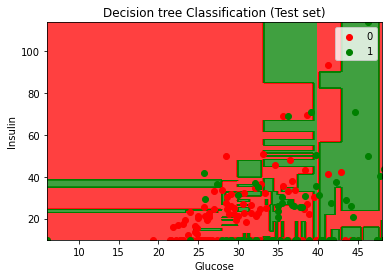

In [72]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc1.inverse_transform(X_test1), y_test1
print(X_set[:,0].min(),X_set[:,0].max())
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = 0.25),
                     np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 0.25))
plt.contourf(X1, X2, dtclassifier.predict(sc1.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision tree Classification (Test set)')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.legend()
plt.show()

In [74]:
#training decision tree on all features
from sklearn.tree import DecisionTreeClassifier
dtclassifier=DecisionTreeClassifier(criterion='entropy',splitter='best',random_state=0)
dtclassifier.fit(X_train,y_train)
y_pred=dtclassifier.predict(X_test)

cm=confusion_matrix(y_test,y_pred)
print(cm)
acc_dt=accuracy_score(y_test,y_pred)
print("Decision Tree Classifier Accuracy",acc_dt)

print("OUTCOME DIABETIC\n")
print("Mis-classification(1-accuracy)",(cm[0][1]+cm[1][0])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]))
Sensitivity=cm[1][1]/(cm[1][1]+cm[1][0])
print("sensitivity",Sensitivity)
print("Specificity(TNR):",cm[0][0]/(cm[0][0]+cm[0][1]))
Precision=cm[1][1]/(cm[1][1]+cm[0][1])
print("precision",Precision)
print("f1 score",2*Precision*Sensitivity/(Precision+Sensitivity))

print("OUTCOME NON DIABETIC")
print("Mis-classification(1-accuracy)",(cm[0][1]+cm[1][0])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]))
Sensitivity=cm[0][0]/(cm[0][0]+cm[0][1])
print("sensitivity",Sensitivity)
print("Specificity(TNR):",cm[1][1]/(cm[1][1]+cm[1][0]))
Precision=cm[0][0]/(cm[0][0]+cm[1][0])
print("precision",Precision)
print("f1 score",2*Precision*Sensitivity/(Precision+Sensitivity))


[[95 30]
 [22 45]]
Decision Tree Classifier Accuracy 0.7291666666666666
OUTCOME DIABETIC

Mis-classification(1-accuracy) 0.2708333333333333
sensitivity 0.6716417910447762
Specificity(TNR): 0.76
precision 0.6
f1 score 0.6338028169014084
OUTCOME NON DIABETIC
Mis-classification(1-accuracy) 0.2708333333333333
sensitivity 0.76
Specificity(TNR): 0.6716417910447762
precision 0.811965811965812
f1 score 0.7851239669421488


In [75]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10)
print("Accuracy of Decision Tree classifier in K fold Cross Validation: {:.2f} %".format(accuracies.mean()*100),
                         "standard deviation :{:.2f}%".format(accuracies.std()*100))

Accuracy of Decision Tree classifier in K fold Cross Validation: 73.95 % standard deviation :5.83%


In [82]:
#training random forest tree on glucose and insulin features
from sklearn.ensemble import RandomForestClassifier
rfclassifier=RandomForestClassifier(n_estimators=15,criterion='entropy',random_state=0)
rfclassifier.fit(X_train1,y_train1)
y_pred=rfclassifier.predict(X_test1)
cm=confusion_matrix(y_pred,y_test1)
print(cm)
print(accuracy_score(y_pred,y_test1))


[[102  30]
 [ 23  37]]
0.7239583333333334


6.05388091473235 48.238905266930416


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


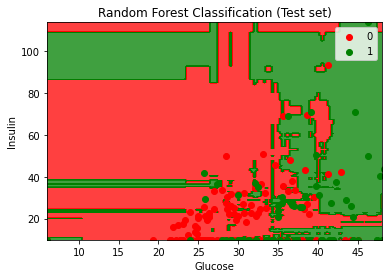

In [83]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc1.inverse_transform(X_test1), y_test1
print(X_set[:,0].min(),X_set[:,0].max())
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = 0.25),
                     np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 0.25))
plt.contourf(X1, X2, rfclassifier.predict(sc1.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Test set)')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.legend()
plt.show()

In [86]:
#trained random forest on all features
rfclassifier=RandomForestClassifier(n_estimators=25,criterion='entropy',random_state=0)
rfclassifier.fit(X_train,y_train)

y_pred=rfclassifier.predict(X_test)

cm=confusion_matrix(y_test,y_pred)
print(cm)
acc_dt=accuracy_score(y_test,y_pred)
print(acc_dt)
print("OUTCOME DIABETIC\n")
print("Mis-classification(1-accuracy)",(cm[0][1]+cm[1][0])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]))
Sensitivity=cm[1][1]/(cm[1][1]+cm[1][0])
print("sensitivity",Sensitivity)
print("Specificity(TNR):",cm[0][0]/(cm[0][0]+cm[0][1]))
Precision=cm[1][1]/(cm[1][1]+cm[0][1])
print("precision",Precision)
print("f1 score",2*Precision*Sensitivity/(Precision+Sensitivity))

print("OUTCOME NON DIABETIC")
print("Mis-classification(1-accuracy)",(cm[0][1]+cm[1][0])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]))
Sensitivity=cm[0][0]/(cm[0][0]+cm[0][1])
print("sensitivity",Sensitivity)
print("Specificity(TNR):",cm[1][1]/(cm[1][1]+cm[1][0]))
Precision=cm[0][0]/(cm[0][0]+cm[1][0])
print("precision",Precision)
print("f1 score",2*Precision*Sensitivity/(Precision+Sensitivity))


[[102  23]
 [ 22  45]]
0.765625
OUTCOME DIABETIC

Mis-classification(1-accuracy) 0.234375
sensitivity 0.6716417910447762
Specificity(TNR): 0.816
precision 0.6617647058823529
f1 score 0.6666666666666667
OUTCOME NON DIABETIC
Mis-classification(1-accuracy) 0.234375
sensitivity 0.816
Specificity(TNR): 0.6716417910447762
precision 0.8225806451612904
f1 score 0.8192771084337349


In [87]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=rfclassifier,X=X_train,y=y_train,cv=10)
print("Accuracy of Random Forest classifier in K fold Cross Validation: {:.2f} %".format(accuracies.mean()*100),
                         "standard deviation :{:.2f}%".format(accuracies.std()*100))

Accuracy of Random Forest classifier in K fold Cross Validation: 74.30 % standard deviation :4.90%


In [88]:
#trained XGBoost on glucose and insulin features
from xgboost import XGBClassifier
xgbclassifier=XGBClassifier()
xgbclassifier.fit(X_train1,y_train1)
y_pred=xgbclassifier.predict(X_test1)
cm=confusion_matrix(y_pred,y_test1)
print(cm)
print(accuracy_score(y_pred,y_test1))


[19:07:27] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[106  35]
 [ 19  32]]
0.71875


C:\Users\Hp\anaconda3\envs\tf\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


6.05388091473235 48.238905266930416


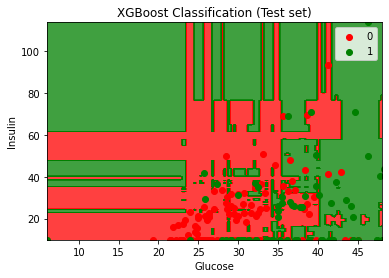

In [89]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc1.inverse_transform(X_test1), y_test1
print(X_set[:,0].min(),X_set[:,0].max())
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = 0.25),
                     np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 0.25))
plt.contourf(X1, X2, xgbclassifier.predict(sc1.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('XGBoost Classification (Test set)')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.legend()
plt.show()

In [90]:
xgbclassifier.fit(X_train,y_train)
y_pred=xgbclassifier.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
acc_dt=accuracy_score(y_test,y_pred)
print("XGBoost Accuracy",acc_dt)
print("OUTCOME DIABETIC\n")
print("Mis-classification(1-accuracy)",(cm[0][1]+cm[1][0])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]))
Sensitivity=cm[1][1]/(cm[1][1]+cm[1][0])
print("sensitivity",Sensitivity)
print("Specificity(TNR):",cm[0][0]/(cm[0][0]+cm[0][1]))
Precision=cm[1][1]/(cm[1][1]+cm[0][1])
print("precision",Precision)
print("f1 score",2*Precision*Sensitivity/(Precision+Sensitivity))

print("OUTCOME NON DIABETIC")
print("Mis-classification(1-accuracy)",(cm[0][1]+cm[1][0])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]))
Sensitivity=cm[0][0]/(cm[0][0]+cm[0][1])
print("sensitivity",Sensitivity)
print("Specificity(TNR):",cm[1][1]/(cm[1][1]+cm[1][0]))
Precision=cm[0][0]/(cm[0][0]+cm[1][0])
print("precision",Precision)
print("f1 score",2*Precision*Sensitivity/(Precision+Sensitivity))


C:\Users\Hp\anaconda3\envs\tf\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:08:15] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[102  23]
 [ 20  47]]
XGBoost Accuracy 0.7760416666666666
OUTCOME DIABETIC

Mis-classification(1-accuracy) 0.22395833333333334
sensitivity 0.7014925373134329
Specificity(TNR): 0.816
precision 0.6714285714285714
f1 score 0.6861313868613139
OUTCOME NON DIABETIC
Mis-classification(1-accuracy) 0.22395833333333334
sensitivity 0.816
Specificity(TNR): 0.7014925373134329
precision 0.8360655737704918
f1 score 0.8259109311740891


In [91]:
accuracies=cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10)
print("Accuracy of xgboost classifier in K fold cross validation: {:.2f} %".format(accuracies.mean()*100),
                         "standard deviation :{:.2f}%".format(accuracies.std()*100))


Accuracy of xgboost classifier in K fold cross validation: 73.95 % standard deviation :5.83%


In [92]:
import tensorflow as tf

In [102]:
#Building ANN
def getModel():
    ann = tf.keras.models.Sequential()
    ann.add(tf.keras.layers.Dense(8, activation='relu'))
    ann.add(tf.keras.layers.Dense(8, activation='relu'))
    
    ann.add(tf.keras.layers.Dense(8, activation='relu'))
    ann.add(tf.keras.layers.Dense(8, activation='relu'))
    ann.add(tf.keras.layers.Dense(8, activation='relu'))
    ann.add(tf.keras.layers.Dense(8, activation='relu'))
    ann.add(tf.keras.layers.Dense(8, activation='relu'))
    ann.add(tf.keras.layers.Dense(8, activation='relu'))
    ann.add(tf.keras.layers.Dense(8, activation='relu'))
    ann.add(tf.keras.layers.Dense(8, activation='relu'))
    ann.add(tf.keras.layers.Dense(8, activation='relu'))
    
    ann.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    ann.compile(optimizer='adam' , loss = tf.losses.binary_crossentropy , metrics=['accuracy'])
    return ann





param_grid = dict(epochs=100, optimizer='adam')

Kmodel = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=getModel, verbose=1)


In [103]:
#training ANN on glucose and insulin features
Kmodel.fit(X_train1,y_train1,batch_size=32,epochs=100)


Epoch 1/100
18/18 [==============================] - 2s 3ms/step - loss: 0.6902 - accuracy: 0.6198
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6818 - accuracy: 0.6510
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6699 - accuracy: 0.6858
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6529 - accuracy: 0.7153
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6283 - accuracy: 0.7396
Epoch 6/100
18/18 [==============================] - 0s 3ms/step - loss: 0.5960 - accuracy: 0.7413
Epoch 7/100
18/18 [==============================] - 0s 3ms/step - loss: 0.5647 - accuracy: 0.7431
Epoch 8/100
18/18 [==============================] - 0s 4ms/step - loss: 0.5473 - accuracy: 0.7465
Epoch 9/100
18/18 [==============================] - 0s 3ms/step - loss: 0.5384 - accuracy: 0.7413
Epoch 10/100
18/18 [==============================] - 0s 3ms/step - loss: 0.5367 - accuracy: 0.7413
Epoch 11/

18/18 [==============================] - 0s 3ms/step - loss: 0.4995 - accuracy: 0.7448
Epoch 84/100
18/18 [==============================] - 0s 3ms/step - loss: 0.4986 - accuracy: 0.7465
Epoch 85/100
18/18 [==============================] - 0s 3ms/step - loss: 0.4987 - accuracy: 0.7465
Epoch 86/100
18/18 [==============================] - 0s 3ms/step - loss: 0.4973 - accuracy: 0.7483
Epoch 87/100
18/18 [==============================] - 0s 3ms/step - loss: 0.5007 - accuracy: 0.7413
Epoch 88/100
18/18 [==============================] - 0s 2ms/step - loss: 0.4994 - accuracy: 0.7378
Epoch 89/100
18/18 [==============================] - 0s 3ms/step - loss: 0.5016 - accuracy: 0.7500
Epoch 90/100
18/18 [==============================] - 0s 3ms/step - loss: 0.4998 - accuracy: 0.7448
Epoch 91/100
18/18 [==============================] - 0s 3ms/step - loss: 0.4991 - accuracy: 0.7431
Epoch 92/100
18/18 [==============================] - 0s 3ms/step - loss: 0.5029 - accuracy: 0.7361
Epoch 93/100


In [104]:
y_pred=Kmodel.predict(X_test1)
y_pred=y_pred>0.5

print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test1.to_numpy().reshape(len(y_test1),1)),axis=1))

[[1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [0 1]

In [105]:
cm = confusion_matrix(y_test1,y_pred)
print(cm)
print(accuracy_score(y_test1,y_pred))
print("OUTCOME DIABETIC\n")
print("Mis-classification(1-accuracy)",(cm[0][1]+cm[1][0])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]))
Sensitivity=cm[1][1]/(cm[1][1]+cm[1][0])
print("sensitivity",Sensitivity)
print("Specificity(TNR):",cm[0][0]/(cm[0][0]+cm[0][1]))
Precision=cm[1][1]/(cm[1][1]+cm[0][1])
print("precision",Precision)
print("f1 score",2*Precision*Sensitivity/(Precision+Sensitivity))

print("OUTCOME NON DIABETIC")
print("Mis-classification(1-accuracy)",(cm[0][1]+cm[1][0])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]))
Sensitivity=cm[0][0]/(cm[0][0]+cm[0][1])
print("sensitivity",Sensitivity)
print("Specificity(TNR):",cm[1][1]/(cm[1][1]+cm[1][0]))
Precision=cm[0][0]/(cm[0][0]+cm[1][0])
print("precision",Precision)
print("f1 score",2*Precision*Sensitivity/(Precision+Sensitivity))


[[107  18]
 [ 35  32]]
0.7239583333333334
OUTCOME DIABETIC

Mis-classification(1-accuracy) 0.2760416666666667
sensitivity 0.47761194029850745
Specificity(TNR): 0.856
precision 0.64
f1 score 0.5470085470085471
OUTCOME NON DIABETIC
Mis-classification(1-accuracy) 0.2760416666666667
sensitivity 0.856
Specificity(TNR): 0.47761194029850745
precision 0.7535211267605634
f1 score 0.8014981273408239


6.05388091473235 48.238905266930416


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


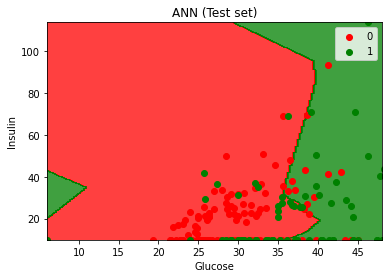

In [106]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc1.inverse_transform(X_test1), y_test1
print(X_set[:,0].min(),X_set[:,0].max())
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = 0.25),
                     np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 0.25))
plt.contourf(X1, X2, Kmodel.predict(sc1.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('ANN (Test set)')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.legend()
plt.show()

In [107]:
#training ANN on all features
Kmodel.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
18/18 [==============================] - 2s 3ms/step - loss: 0.6924 - accuracy: 0.5903
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6879 - accuracy: 0.6510
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6826 - accuracy: 0.6771
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6752 - accuracy: 0.7170
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6627 - accuracy: 0.7500
Epoch 6/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6455 - accuracy: 0.7622
Epoch 7/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6224 - accuracy: 0.7674
Epoch 8/100
18/18 [==============================] - 0s 3ms/step - loss: 0.5997 - accuracy: 0.7812
Epoch 9/100
18/18 [==============================] - 0s 3ms/step - loss: 0.5757 - accuracy: 0.7865
Epoch 10/100
18/18 [==============================] - 0s 3ms/step - loss: 0.5553 - accuracy: 0.7830
Epoch 11/

18/18 [==============================] - 0s 3ms/step - loss: 0.3633 - accuracy: 0.8403
Epoch 84/100
18/18 [==============================] - 0s 3ms/step - loss: 0.3540 - accuracy: 0.8472
Epoch 85/100
18/18 [==============================] - 0s 3ms/step - loss: 0.3561 - accuracy: 0.8299
Epoch 86/100
18/18 [==============================] - 0s 3ms/step - loss: 0.3550 - accuracy: 0.8490
Epoch 87/100
18/18 [==============================] - 0s 3ms/step - loss: 0.3469 - accuracy: 0.8490
Epoch 88/100
18/18 [==============================] - 0s 3ms/step - loss: 0.3491 - accuracy: 0.8403
Epoch 89/100
18/18 [==============================] - 0s 3ms/step - loss: 0.3558 - accuracy: 0.8333
Epoch 90/100
18/18 [==============================] - 0s 3ms/step - loss: 0.3431 - accuracy: 0.8403
Epoch 91/100
18/18 [==============================] - 0s 3ms/step - loss: 0.3486 - accuracy: 0.8403
Epoch 92/100
18/18 [==============================] - 0s 3ms/step - loss: 0.3466 - accuracy: 0.8455
Epoch 93/100


In [113]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))
print("OUTCOME DIABETIC\n")
print("Mis-classification(1-accuracy)",(cm[0][1]+cm[1][0])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]))
Sensitivity=cm[1][1]/(cm[1][1]+cm[1][0])
print("sensitivity",Sensitivity)
print("Specificity(TNR):",cm[0][0]/(cm[0][0]+cm[0][1]))
Precision=cm[1][1]/(cm[1][1]+cm[0][1])
print("precision",Precision)
print("f1 score",2*Precision*Sensitivity/(Precision+Sensitivity))

print("OUTCOME NON DIABETIC")
print("Mis-classification(1-accuracy)",(cm[0][1]+cm[1][0])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]))
Sensitivity=cm[0][0]/(cm[0][0]+cm[0][1])
print("sensitivity",Sensitivity)
print("Specificity(TNR):",cm[1][1]/(cm[1][1]+cm[1][0]))
Precision=cm[0][0]/(cm[0][0]+cm[1][0])
print("precision",Precision)
print("f1 score",2*Precision*Sensitivity/(Precision+Sensitivity))


[[109  16]
 [ 32  35]]
0.75
OUTCOME DIABETIC

Mis-classification(1-accuracy) 0.25
sensitivity 0.5223880597014925
Specificity(TNR): 0.872
precision 0.6862745098039216
f1 score 0.5932203389830508
OUTCOME NON DIABETIC
Mis-classification(1-accuracy) 0.25
sensitivity 0.872
Specificity(TNR): 0.5223880597014925
precision 0.7730496453900709
f1 score 0.8195488721804511


In [109]:
accuracies = cross_val_score(estimator=Kmodel, X=X_train,y=y_train, scoring='accuracy',cv=10)
print("Accuracy of ANN  in K fold cross validation: {:.2f} %".format(accuracies.mean()*100),
                         "standard deviation :{:.2f}%".format(accuracies.std()*100))

17/17 [==============================] - 2s 3ms/step - loss: 0.6903 - accuracy: 0.6146
Accuracy of ANN  in K fold cross validation: 64.76 % standard deviation :3.03%


In [111]:
#training MLP on glucose and insulin features
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(max_iter=1000,alpha=1)
mlp.fit(X_train1,y_train1)
y_pred=mlp.predict(X_test1)
cm=confusion_matrix(y_test1,y_pred)
print(cm)
acc=accuracy_score(y_test1,y_pred)
print(acc)
print("MLP Classifier Mis-classification(1-accuracy)",(cm[0][1]+cm[1][0])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]))
Sensitivity=cm[1][1]/(cm[1][1]+cm[0][1])
print("MLP Classifier sensitivity",Sensitivity)
print("MLP Classifier Specificity(TNR):",cm[0][0]/(cm[0][0]+cm[0][1]))
Precision=cm[1][1]/(cm[1][1]+cm[0][1])
print("MLP Classifier precision",Precision)
print("MLP Classifier f1 score",2*Precision*Sensitivity/(Precision+Sensitivity))


[[109  16]
 [ 32  35]]
0.75
MLP Classifier Mis-classification(1-accuracy) 0.25
MLP Classifier sensitivity 0.6862745098039216
MLP Classifier Specificity(TNR): 0.872
MLP Classifier precision 0.6862745098039216
MLP Classifier f1 score 0.6862745098039216


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


6.05388091473235 48.238905266930416


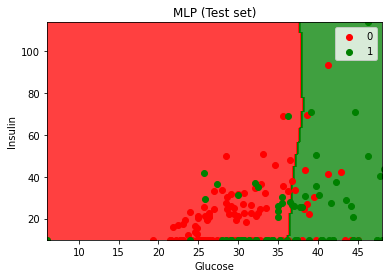

In [112]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc1.inverse_transform(X_test1), y_test1
print(X_set[:,0].min(),X_set[:,0].max())
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = 0.25),
                     np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 0.25))
plt.contourf(X1, X2, mlp.predict(sc1.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('MLP (Test set)')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.legend()
plt.show()

In [114]:
#Trained MLP on all features 
mlp.fit(X_train,y_train)
y_pred=mlp.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))
print("OUTCOME DIABETIC\n")
print("Mis-classification(1-accuracy)",(cm[0][1]+cm[1][0])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]))
Sensitivity=cm[1][1]/(cm[1][1]+cm[1][0])
print("sensitivity",Sensitivity)
print("Specificity(TNR):",cm[0][0]/(cm[0][0]+cm[0][1]))
Precision=cm[1][1]/(cm[1][1]+cm[0][1])
print("precision",Precision)
print("f1 score",2*Precision*Sensitivity/(Precision+Sensitivity))

print("OUTCOME NON DIABETIC")
print("Mis-classification(1-accuracy)",(cm[0][1]+cm[1][0])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]))
Sensitivity=cm[0][0]/(cm[0][0]+cm[0][1])
print("sensitivity",Sensitivity)
print("Specificity(TNR):",cm[1][1]/(cm[1][1]+cm[1][0]))
Precision=cm[0][0]/(cm[0][0]+cm[1][0])
print("precision",Precision)
print("f1 score",2*Precision*Sensitivity/(Precision+Sensitivity))


[[110  15]
 [ 22  45]]
0.8072916666666666
OUTCOME DIABETIC

Mis-classification(1-accuracy) 0.19270833333333334
sensitivity 0.6716417910447762
Specificity(TNR): 0.88
precision 0.75
f1 score 0.7086614173228347
OUTCOME NON DIABETIC
Mis-classification(1-accuracy) 0.19270833333333334
sensitivity 0.88
Specificity(TNR): 0.6716417910447762
precision 0.8333333333333334
f1 score 0.8560311284046693


In [115]:
accuracies=cross_val_score(estimator=mlp,X=X_train,y=y_train,cv=10)
print("Accuracy of MLP in K fold cross validation {:2f}".format(accuracies.mean()*100))
print("Standard deviation of MLP in K fold cross validation{:2f}".format(accuracies.std()*100))

Accuracy of MLP in K fold cross validation 76.028433
Standard deviation of MLP in K fold cross validation5.181608


In [ ]:
#CNN
#cnn=tf.keras.models.Sequential()

In [ ]:
#cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[392,8,2]))
#cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
#second convolutional layer
#cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[392,8,2]))
#cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
#flattening
#cnn.add(tf.keras.layers.Flatten())

In [ ]:
#full connection
#cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [ ]:
#output layer
#cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [ ]:
#cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')

In [ ]:
#cnn.fit(x=tf.data.Dataset.from_tensor_slices(X_train),validation_data=tf.data.Dataset.from_tensor_slices(X_test),epochs=25)